       Assignment 1: Data Science   





Preprocessing data and descriptive analytics on sales and  reduce the dataset   







DATASET OVERVIEW





OBJECTIVE:   Loading the dataset and understand its basic structure


  

OVERVIEW:   



1. 13 columns and 450 rows are in the dataset.   



2. Details such as date, day, SKU, brand, volume, and average price are displayed in the first preview Sales values and the discount rate


The dataset records information such as product sales, reductions in prices, and descriptive variables like brand, model, and business unit.

In [ ]:
import pandas as pd

df = pd.read_csv("sales_data_with_discounts.csv")

print(df.shape)

print(df.columns)

print (df.head())

2.  NUMERICAL COLUMNS DESCRIPTIVE STATISTICS

The goal is: To Calculate the variance, average, median, and mode


OVERVIEW:

The central tendency of each numerical column and
spread were computed.

The numerical columns differ greatly from one another. The wide range of Net Sales Value, for instance, suggests that the average is influenced by outliers or high-value transactions.


In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

print(df[numerical_cols].mean())

print(df[numerical_cols].median())

print(df[numerical_cols].mode().iloc[0])

print(df[numerical_cols].std())

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64
Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64
Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64
Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


 3:    HISTOGRAMS & BOXPLOTS VISUALIZATION

The goal is: with the help of boxplots and histograms to spot outliers i have visualized the distributions

a) HISTOGRAM

1. So the Most of the numerical variables show a strong skew to the right, this suggests that the data is centered at low values and there are some very large values.

2. Although there are some high-value cases, smaller transactions account for the majority of both volume and total sales value.  

3. The Discount Rate (%) has less skewed distribution as compared to other variables which shows a greater level of uniformit

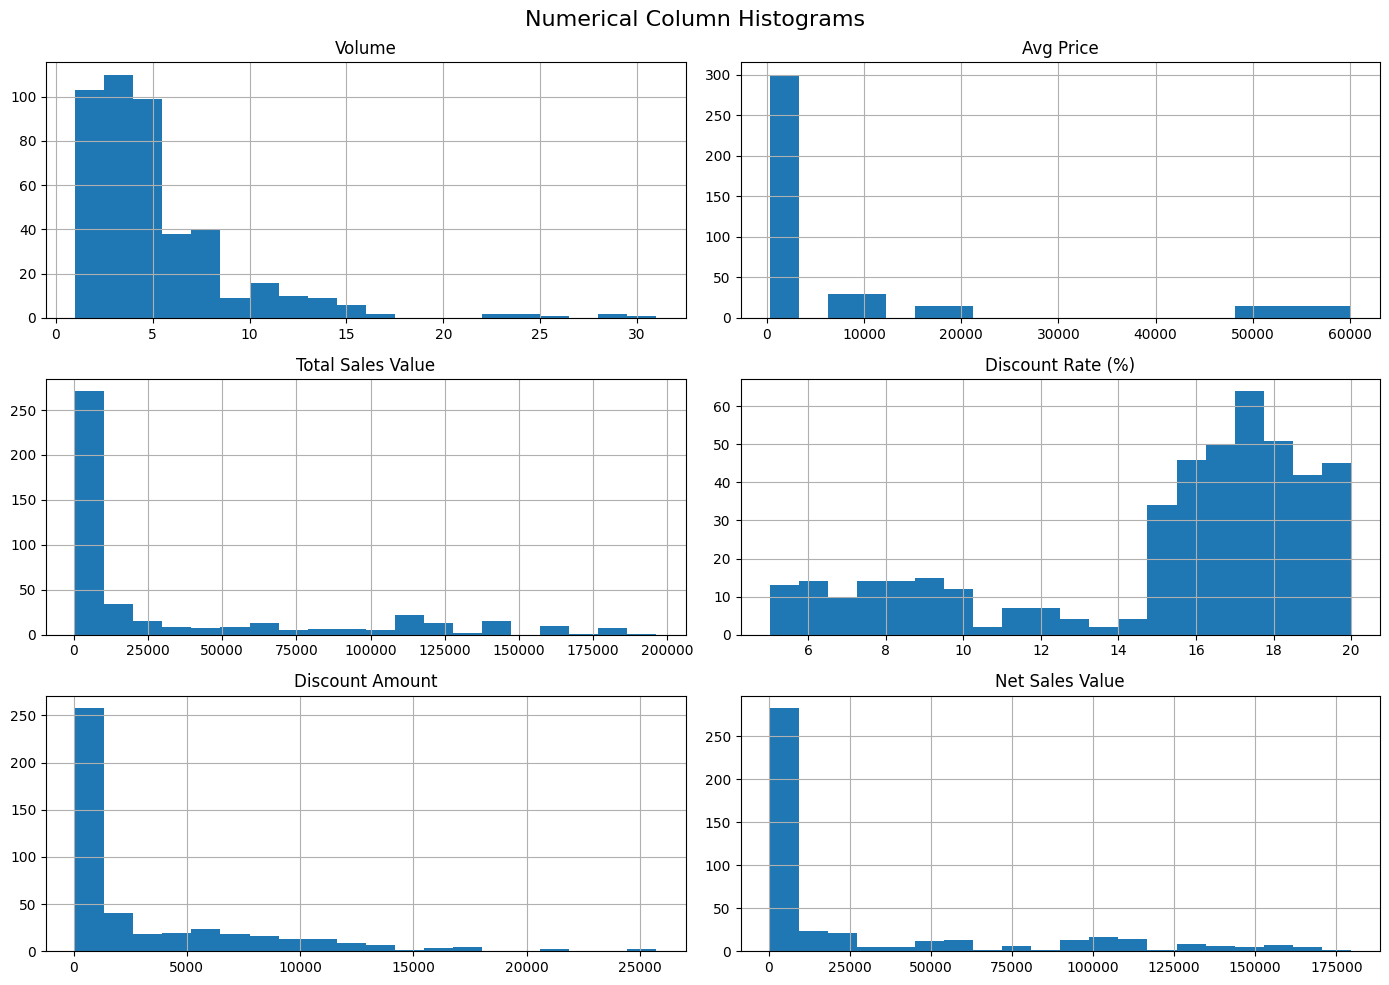

In [ ]:
# HISTOGRAM

import matplotlib.pyplot as plt

df[numerical_cols].hist(figsize=(14, 10), bins=20)

plt.suptitle("Numerical Column Histograms", fontsize=16)

plt.tight_layout()

plt.show()

In [ ]:
# BOXPLOTS:

plt.figure(figsize=(14, 10))

for i, col in enumerate(numerical_cols):

plt.subplot(2, 3, i+1)

sns.boxplot(x=df[col])

plt.title(f'Boxplot of {col}')

plt.tight_layout()

plt.show()

b) BOXPLOTS

There are a lot of extreme outliers in volume, average price, total sales value, discount amount, and net sales value, indicating that some transactions are significantly larger than the majority and that the distributions are skewed to the right.

Although the Discount Rate (%) has outliers as well, its distribution is more balanced and tighter than that of the other variables, with values primarily concentrated between 10% and 18%, suggesting that it is comparatively more stable.

4:     Analysis of Categorical Columns via Bar Chart



Goal is to explore the frequency distribution of categorical variables.

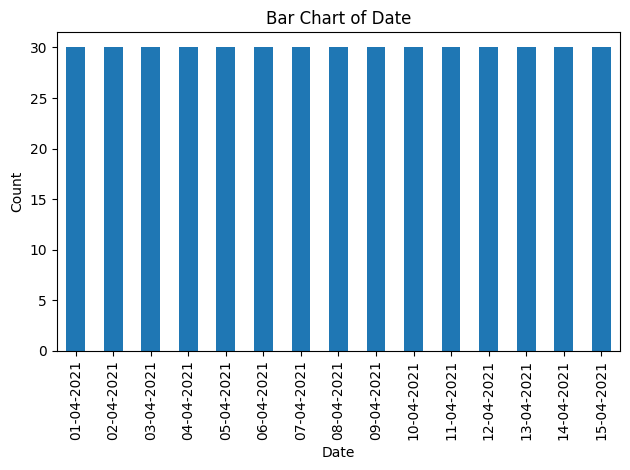

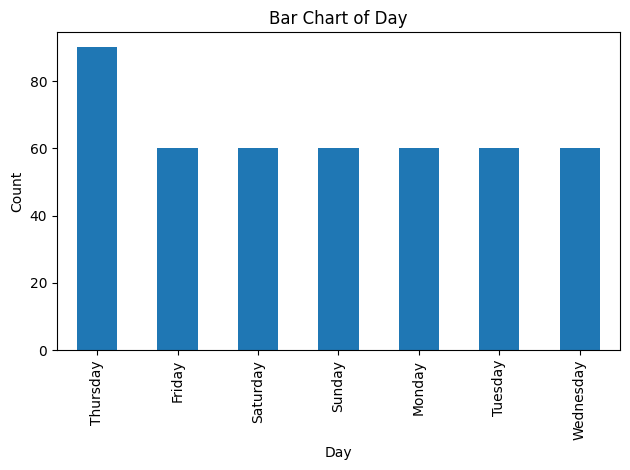

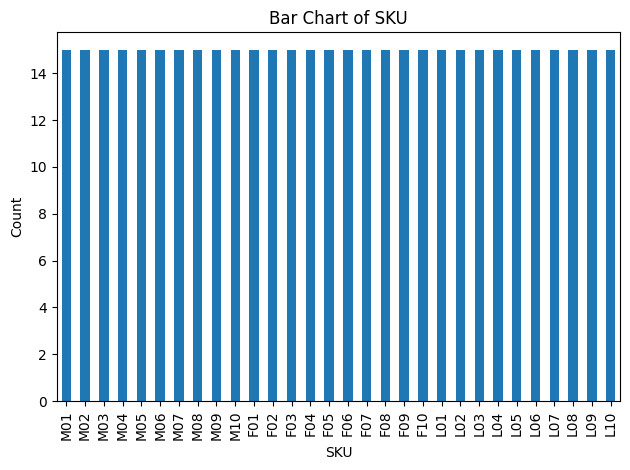

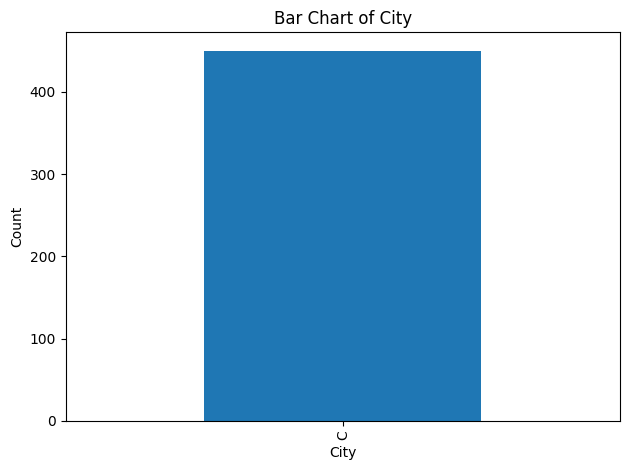

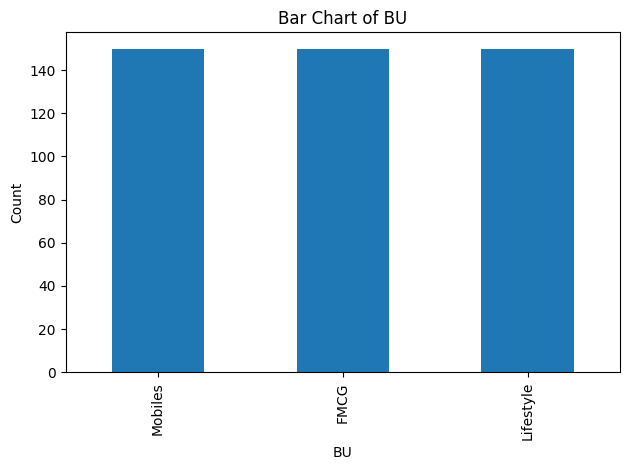

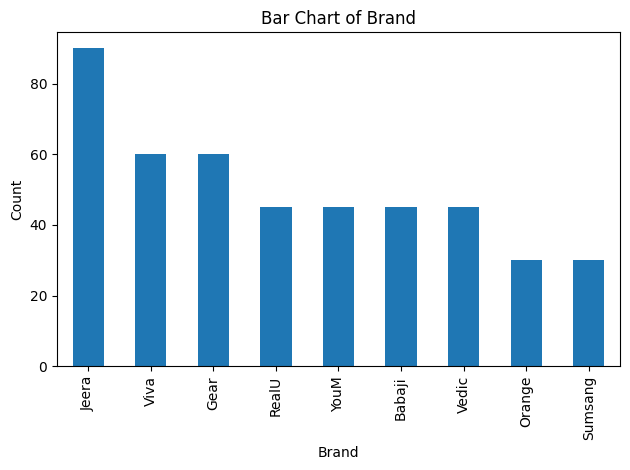

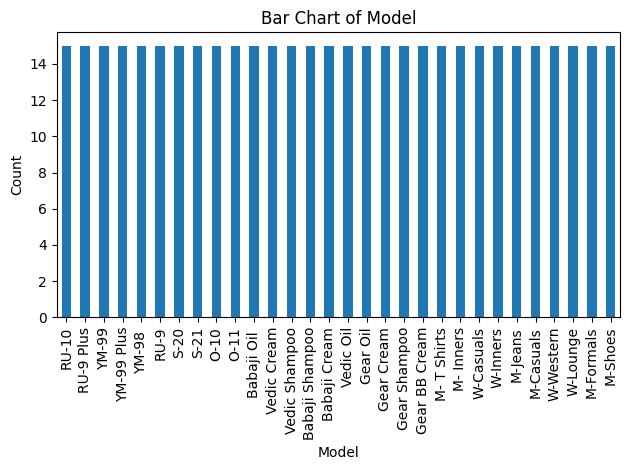

In [ ]:
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()




5:          STANDARDIZING THE NUMERICAL VARIABLES  



Goal is to Use z-score standardization to standardize the numerical columns

In [17]:
from scipy.stats import zscore

df_standardized = df.copy()
df_standardized[numerical_cols] = df_standardized[numerical_cols].apply(zscore)

print("Before Standardization:\n", df[numerical_cols].describe())
print("\nAfter Standardization:\n", df_standardized[numerical_cols].describe())

Before Standardization:
            Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427 

**Before Standardization**:

The scales of the variables (Volume, Average Price, Discount Amount, Net Sales Value, etc.) are highly disparate.

For instance:

Volume is between 1 and 31.

The average price is between $290 and $60,100.

Net sales value has a range from 327 to 179,507  

The huge range is the reason that scale-sensitive algorithms (e.g., KNN, SVM, clustering, and PCA) will be affected by the different magnitudes of features (e.g., Net Sales Value, Average Price) and thus, they will be biased towards features with higher





**Following Standardization**:

The standard deviation is now within one and the mean is within zero for all features.

While the min and max values have been rescaled to more similar ranges, they still exhibit some relative variation.  

This method is appropriate for distance-based or scale-sensitive methods (such as K-Means, PCA, and logistic regression with regularization) as it allows features to have consistent values.

**6. CONVERTING THE DATA FOR MACHINE LEARNING**



Goal is to convert categorical variables into separate binary (0/1) columns.

In [18]:
df_encoded = pd.get_dummies(df, columns=categorical_cols)

print("Before Encoding:", df.shape)
print("After Encoding:", df_encoded.shape)

df_encoded.head()

Before Encoding: (450, 13)
After Encoding: (450, 101)


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


After encoding, the dataset grew from 13 columns to 101. Machine learning models can now appropriately handle categorical data without assuming ordinal relationships because each category now has its own binary column.

**7. CONCLUSION**

In this assignment I successfully investigated and prepared a real-world sales dataset for analysis and modeling through this assignment. calculated descriptive statistics, visualized the data trends and outliers, and correctly handled numerical and categorical features after exploring the structure. Because of these preprocessing steps, the data is clean, consistent, and ready for use in machine learning, predictive modeling applications.  

As a result, the exercise has been an effective showcase of the role of rigorous data prep work in the scope of any data science workflow.